# Capstone Problem Statement:

Real estate market trend analysis to predict real estate market demand, property value such as buying/selling prices and property rent prices.



## Data source

Dataset comes from Kaggle [link](https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset).  



In [452]:
# import required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

### Understanding the Data and Features

In [453]:
# Read and create dataframe for housing data
housing_df = pd.read_csv('Housing.csv')

In [454]:
# Look at the snapshot of the loaded data in dataframe
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [455]:
# look at the data information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [456]:
# Note the shape of the dataframe
housing_df.shape

(21613, 21)

In [457]:
# Note the description of the dataframe
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [458]:
# Check if any null values
housing_df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [459]:
# check if any missing values
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [460]:
# Check if there are 0s as value
housing_df.eq(0).sum() /21613 * 100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.060149
bathrooms         0.046268
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       99.245824
view             90.172581
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement    60.731967
yr_built          0.000000
yr_renovated     95.771064
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [461]:
# Note the unique value counts for each column
housing_df.nunique()

id               21436
date               372
price             4029
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [462]:
# drop the date and id column as it's not directly affecting the house price
housing_df.drop(columns = ['id','date'], inplace = True)

# verify that the columns count is now dropped from 21 to 19.
housing_df.shape

(21613, 19)

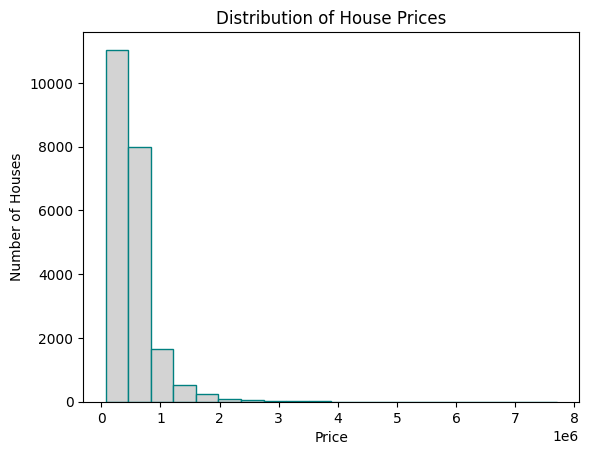

<Figure size 1500x1000 with 0 Axes>

In [463]:
# Visualize Price distribution for the housing dataset
housing_df['price'].plot(kind='hist', bins=20, color='lightgrey', edgecolor='teal')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.figure(figsize=(15, 10))
plt.show()

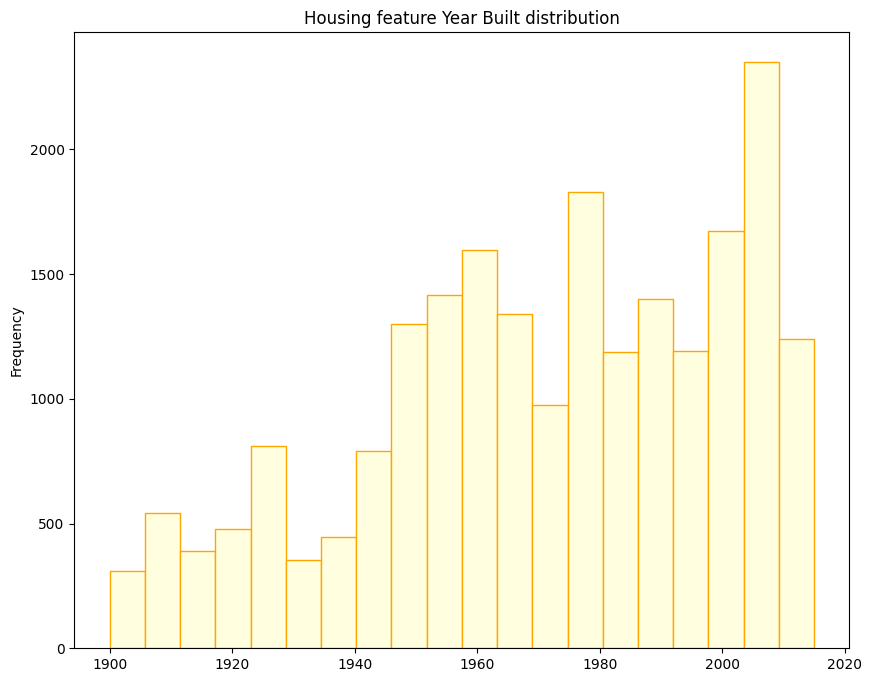

In [464]:
# Visualize yr_built feature
housing_df['yr_built'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightyellow',edgecolor='orange' )
plt.title('Housing feature Year Built distribution')
plt.show()

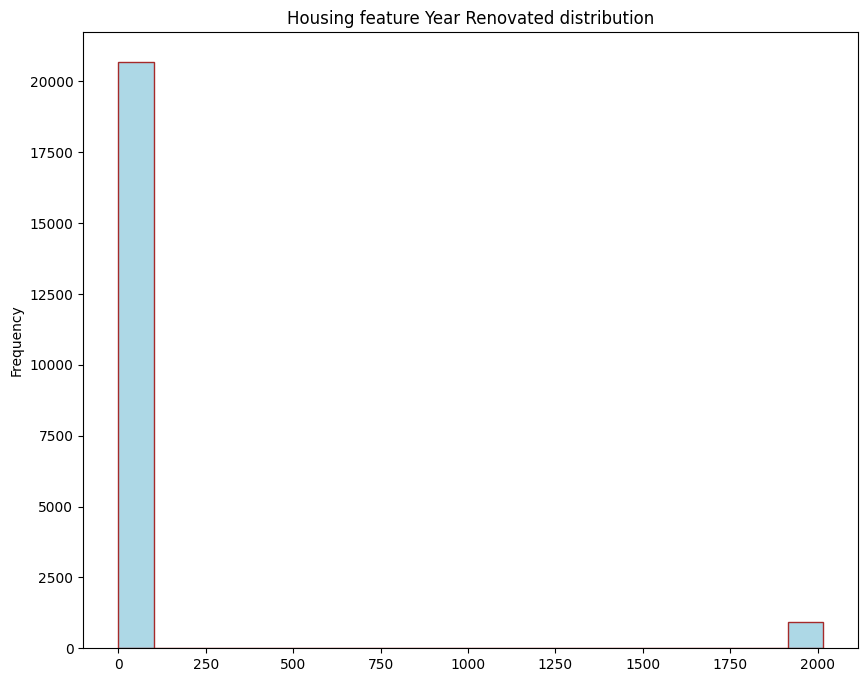

In [465]:
# Visualize yr_renovated feature
housing_df['yr_renovated'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightblue',edgecolor='brown' )
plt.title('Housing feature Year Renovated distribution')
plt.show()

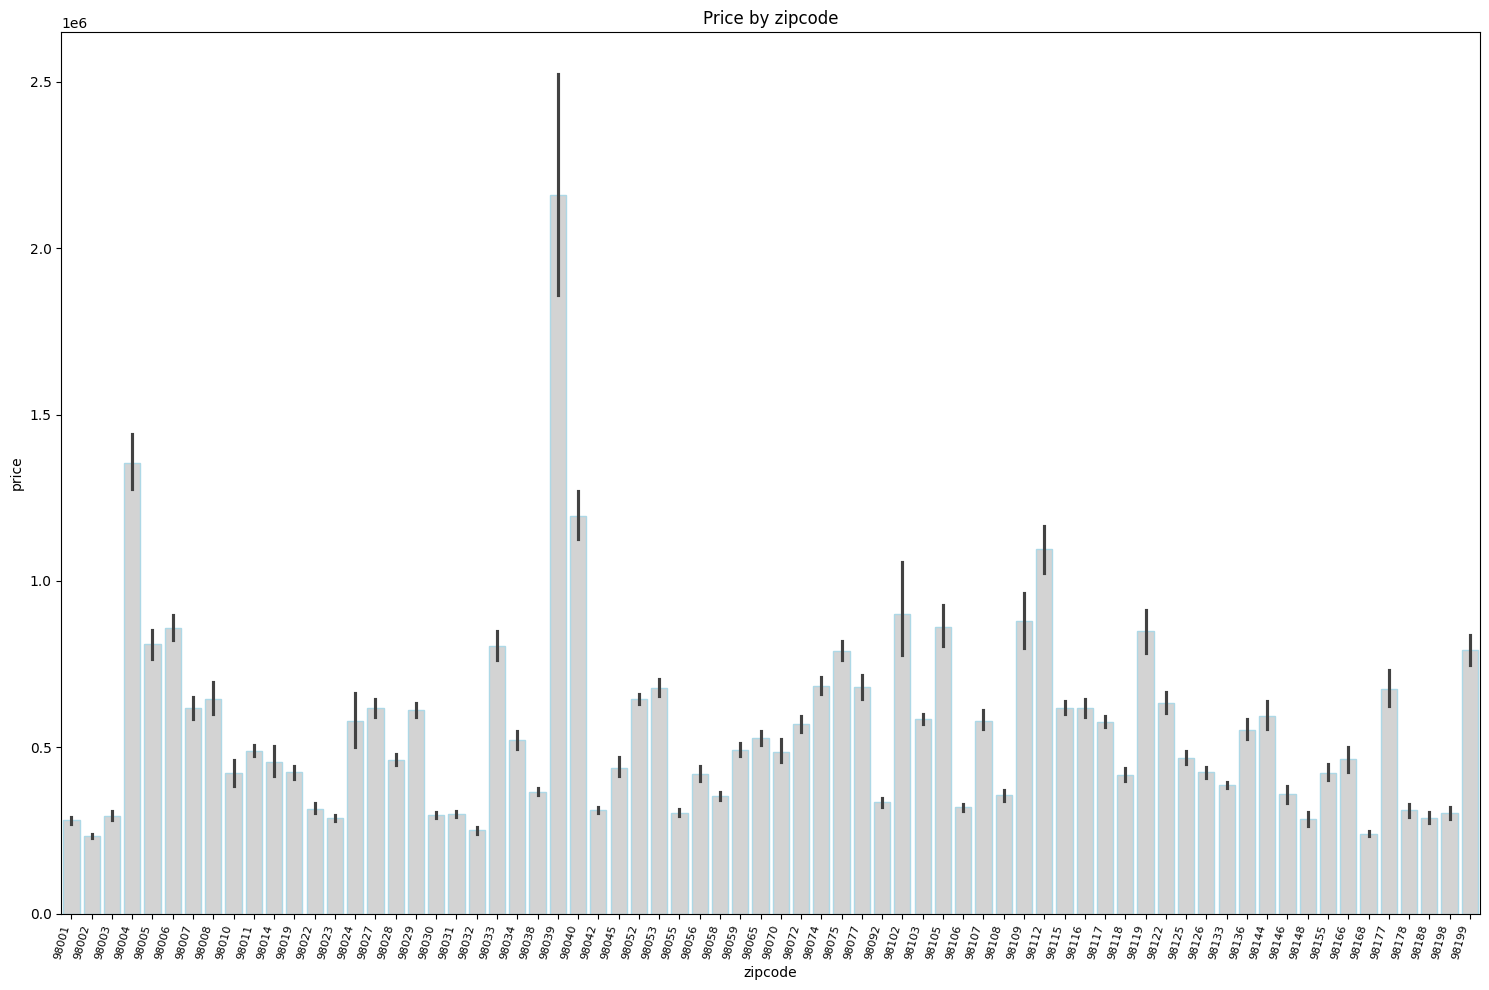

In [466]:
# Visualize price by zipcode feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='zipcode', y='price', data=housing_df,color = 'lightgrey',edgecolor='lightblue', ax=ax)
plt.title('Price by zipcode')
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.tight_layout()
plt.show()

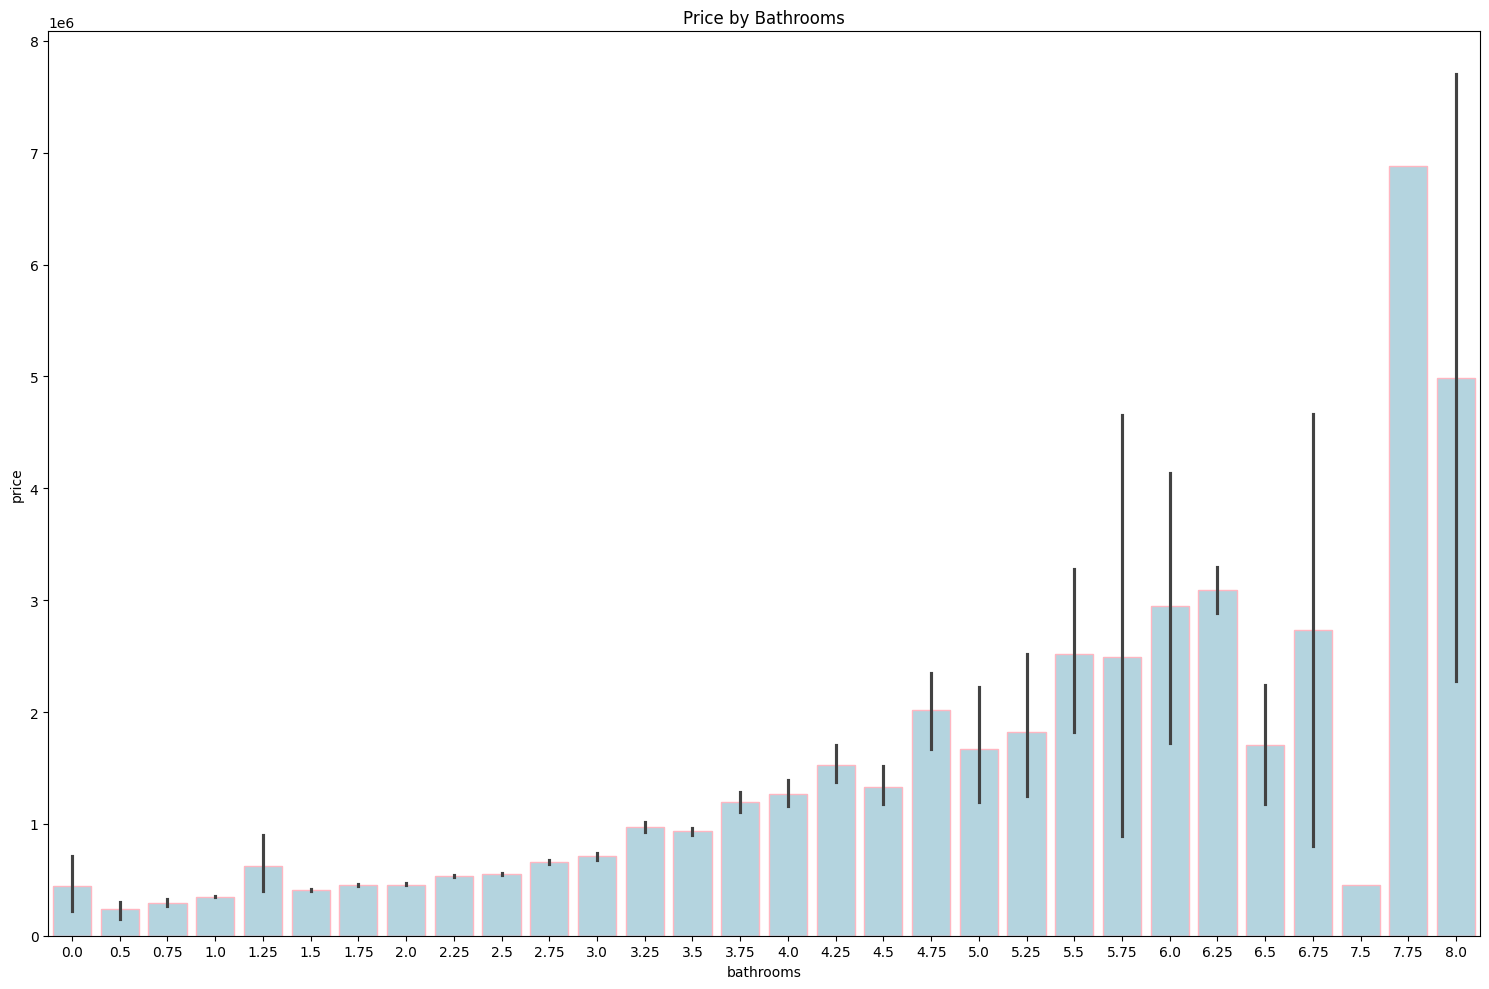

In [467]:
# Visualize price vs bathrooms feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='bathrooms', y='price', data=housing_df,color = 'lightblue',edgecolor='lightpink', ax=ax)
plt.title('Price by Bathrooms')
plt.tight_layout()
plt.show()

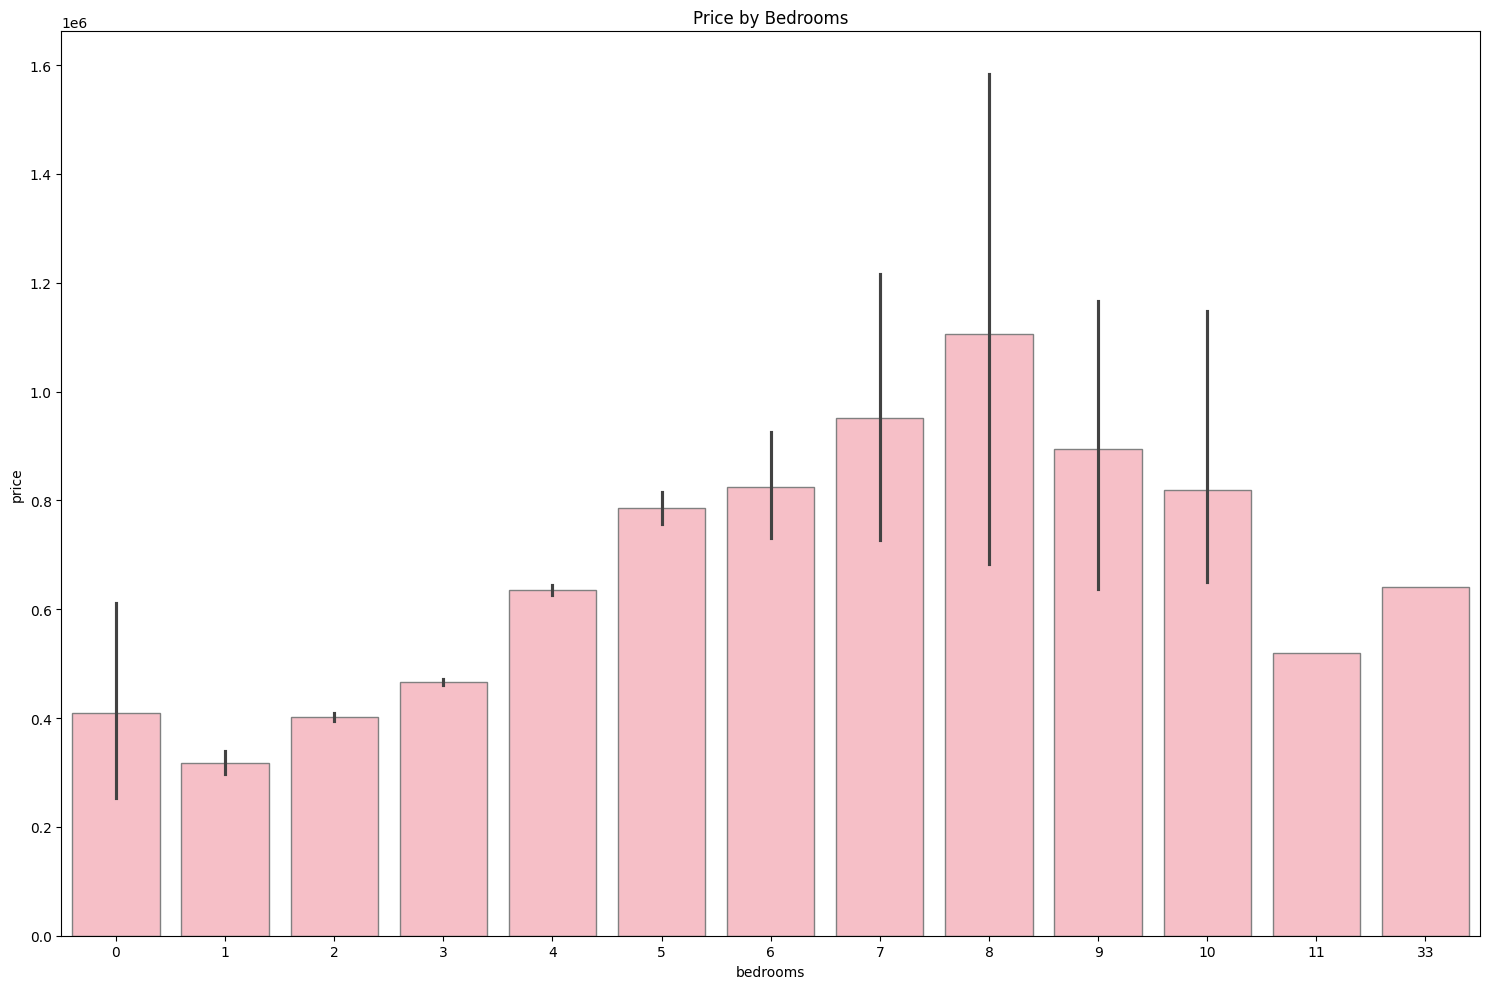

In [468]:
# Visualize price vs bedrooms feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='bedrooms', y='price', data=housing_df,color = 'lightpink',edgecolor='grey', ax=ax)
plt.title('Price by Bedrooms')
plt.tight_layout()
plt.show()

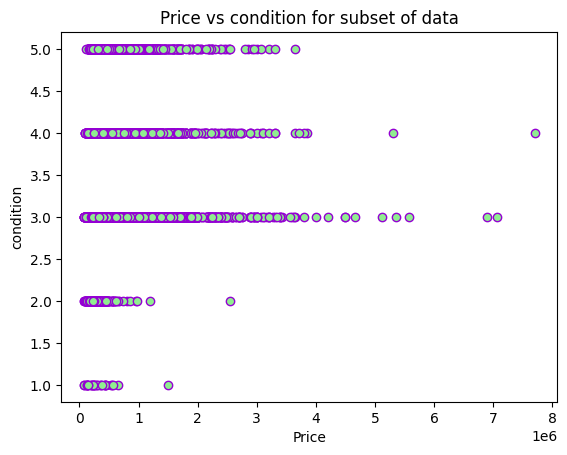

<Figure size 1500x1000 with 0 Axes>

In [469]:
# Visualize price vs condition(scaled from 1 to 5) for subset of data using Scatter Plot
plt.scatter(housing_df['price'], housing_df['condition'],color='lightgreen',edgecolor='darkviolet')
plt.xlabel('Price')
plt.ylabel('condition')
plt.title('Price vs condition for subset of data')
plt.figure(figsize=(15, 10))
plt.show()

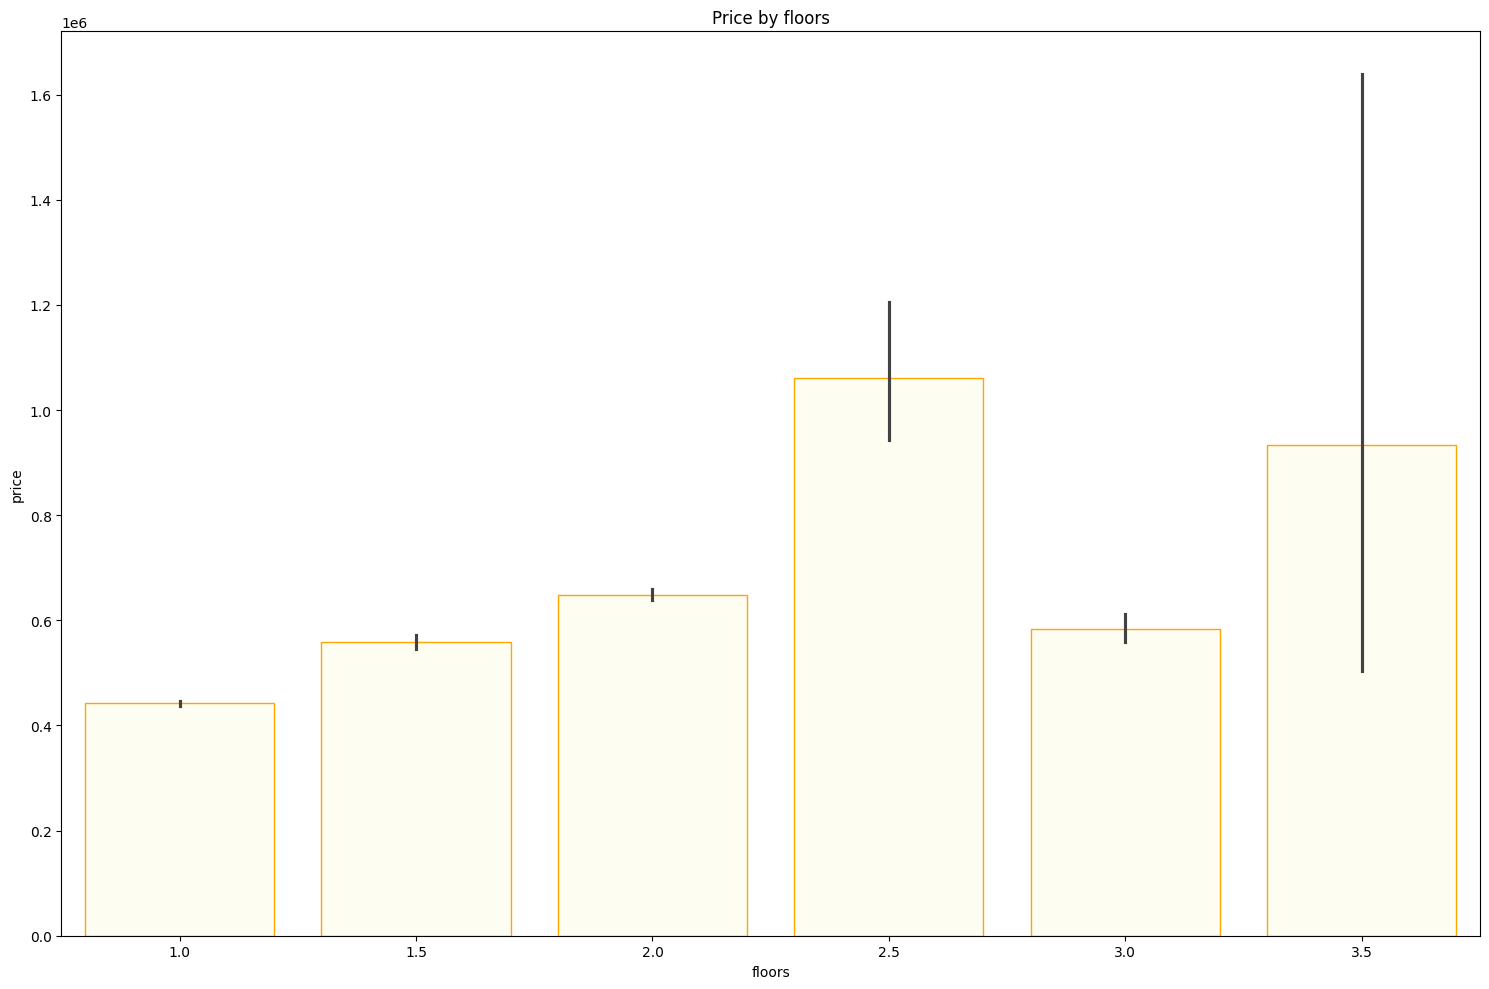

In [470]:
# Visualize price by floors
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='floors', y='price', data=housing_df,color = 'ivory',edgecolor='orange', ax=ax)
plt.title('Price by floors')
plt.tight_layout()
plt.show()

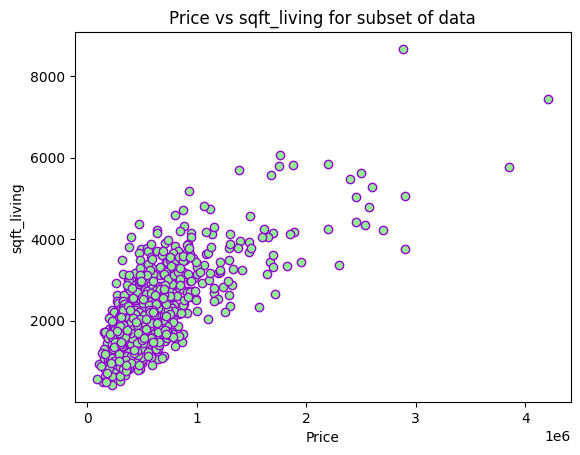

<Figure size 1500x1000 with 0 Axes>

In [471]:
# Visualize price vs sqft_living for subset of data using Scatter Plot
sample_size = 1000 
sampled_indices = random.sample(range(len(housing_df)), sample_size)
df_sampled = housing_df.iloc[sampled_indices]
plt.scatter(df_sampled['price'], df_sampled['sqft_living'],color='lightgreen',edgecolor='darkviolet')
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.title('Price vs sqft_living for subset of data')
plt.figure(figsize=(15, 10))
plt.show()

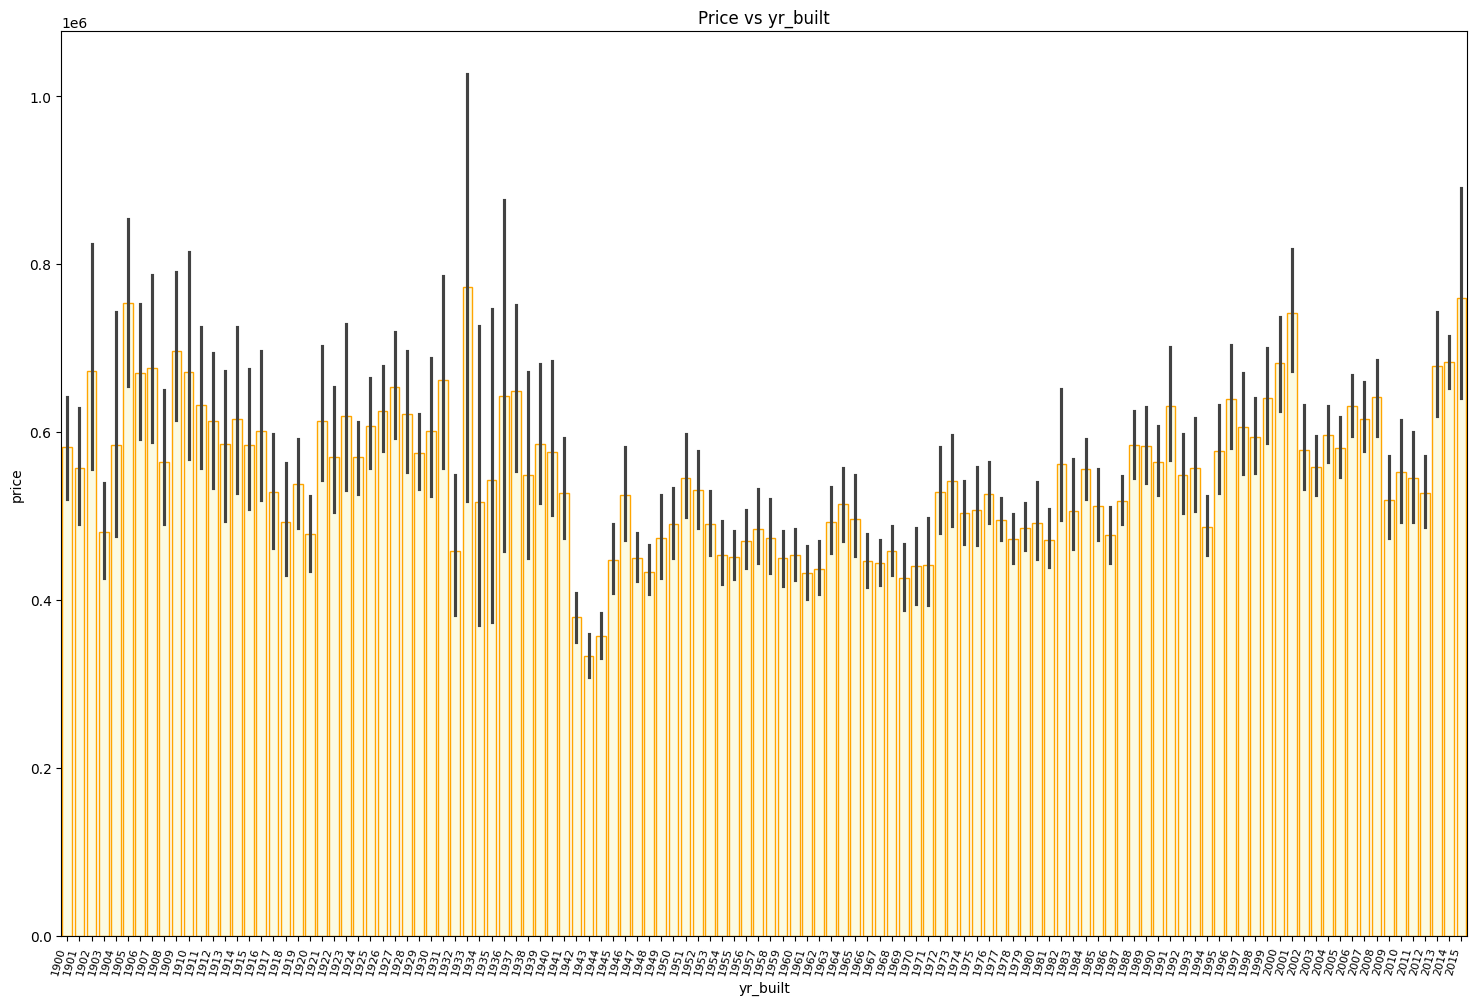

In [472]:
# Visualize price by yr_built
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='yr_built', y='price', data=housing_df,color = 'lightyellow',edgecolor='orange', ax=ax)
plt.title('Price vs yr_built')
plt.tight_layout()
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.show()

<Axes: >

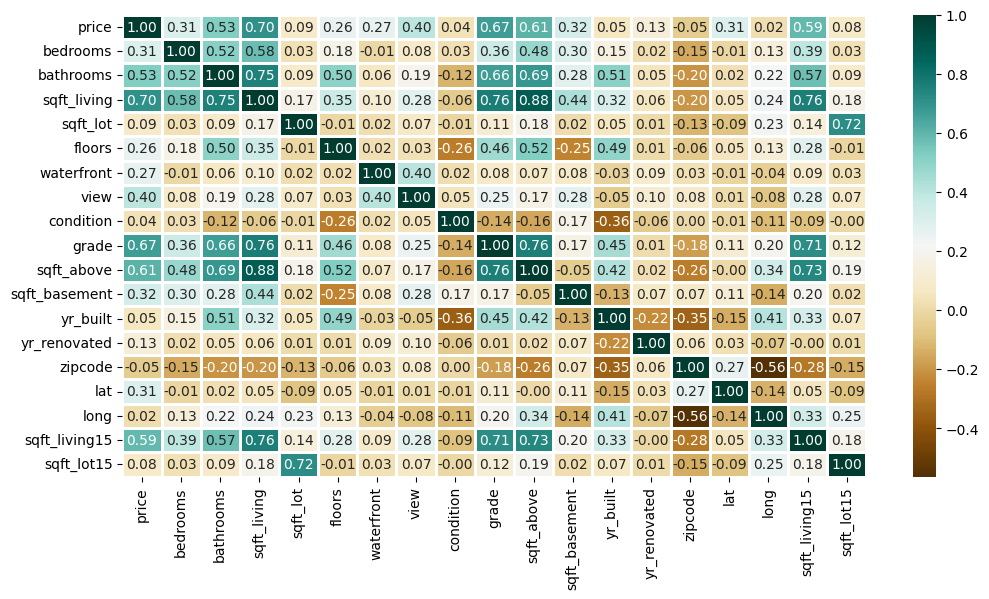

In [473]:
# Visualize correlation of all features for housing data
plt.figure(figsize=(12, 6))
sns.heatmap(housing_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


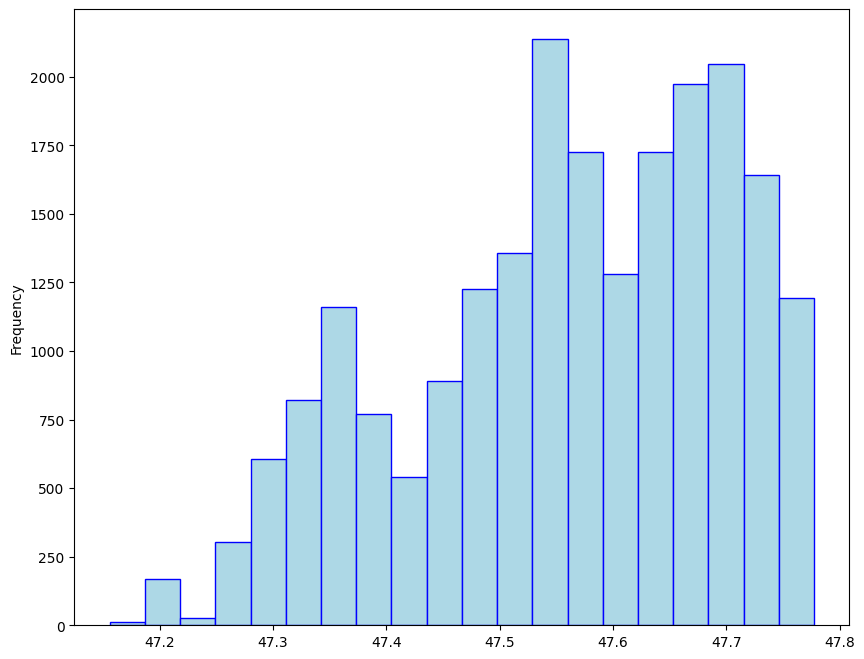

In [474]:
# Visualize distribution of house latitude feature
housing_df['lat'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightblue',edgecolor='blue' )
plt.show()

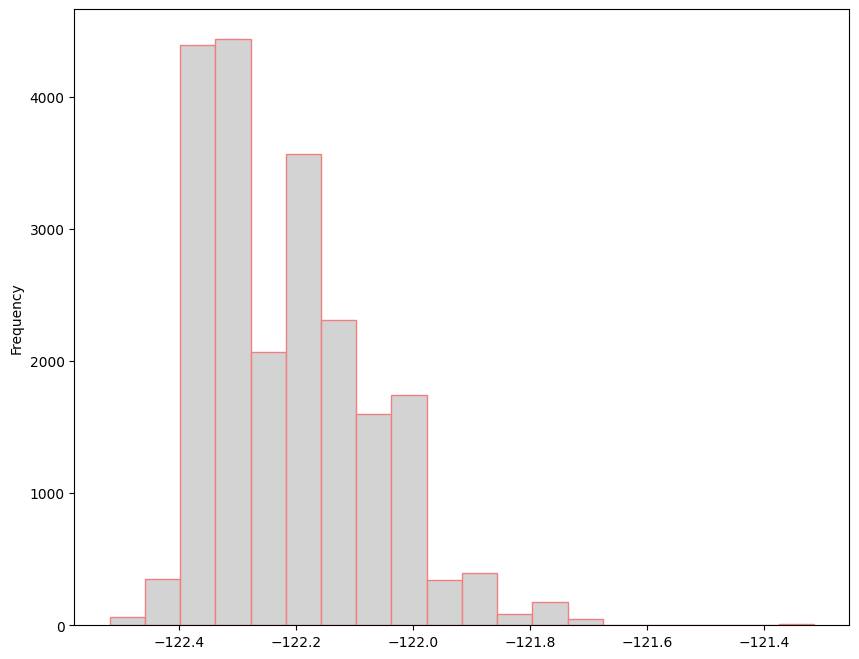

In [475]:
# Visualize distribution of house longitude feature
housing_df['long'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightgrey',edgecolor='lightcoral' )
plt.show()

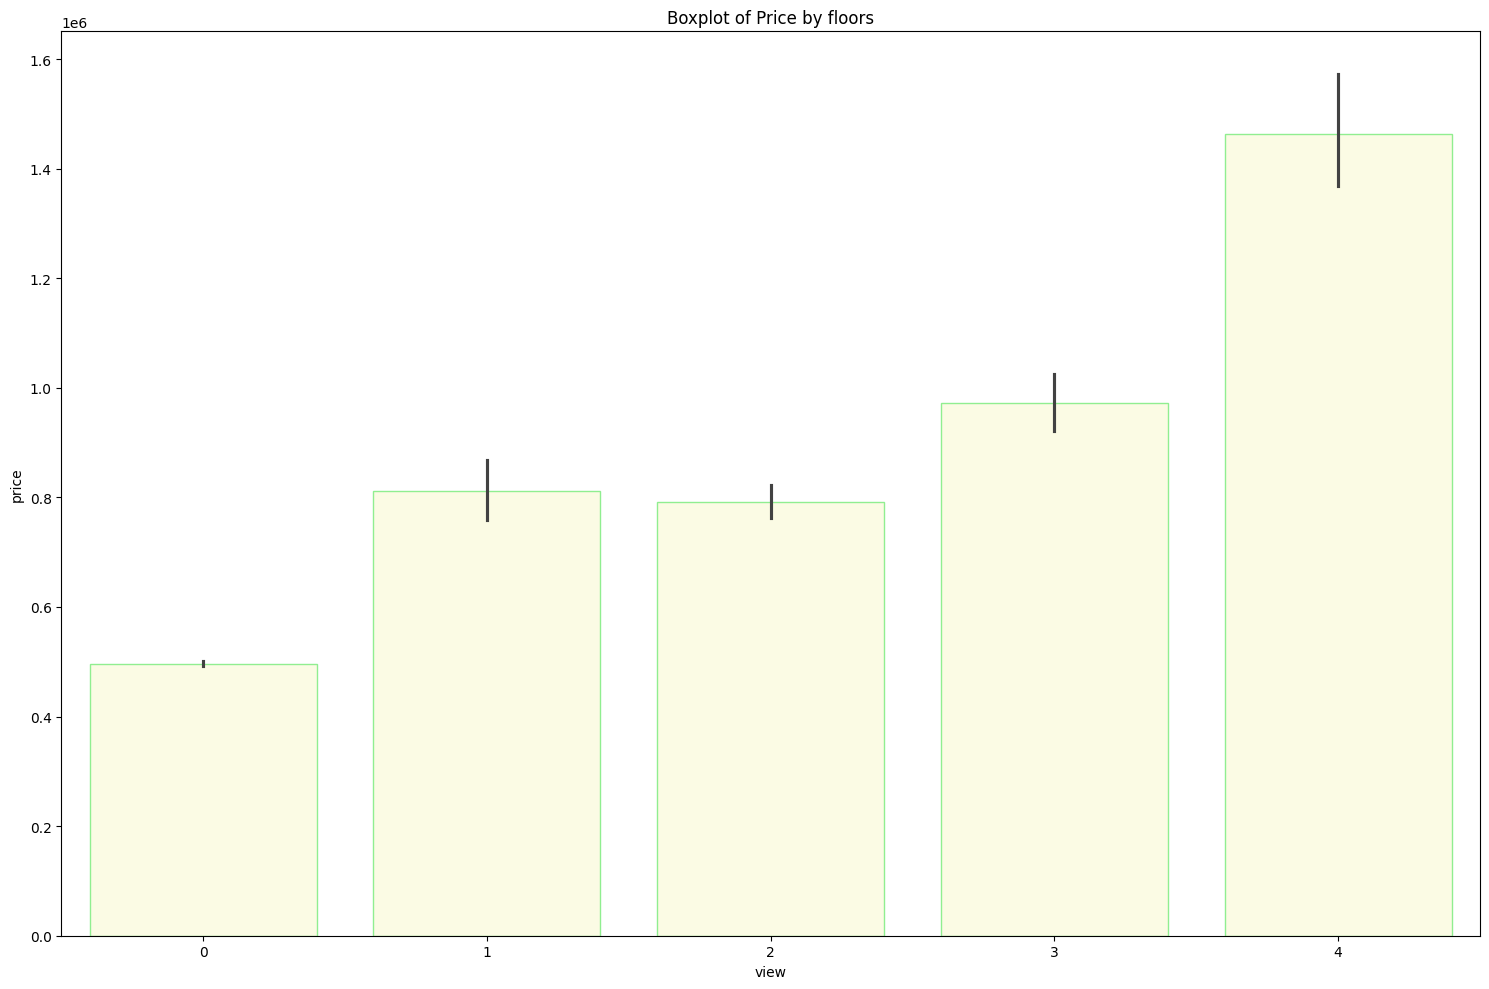

In [476]:
# Visualize price by view feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='view', y='price', data=housing_df,color = 'lightyellow',edgecolor='lightgreen', ax=ax)
plt.title('Boxplot of Price by floors')
plt.tight_layout()
plt.show()

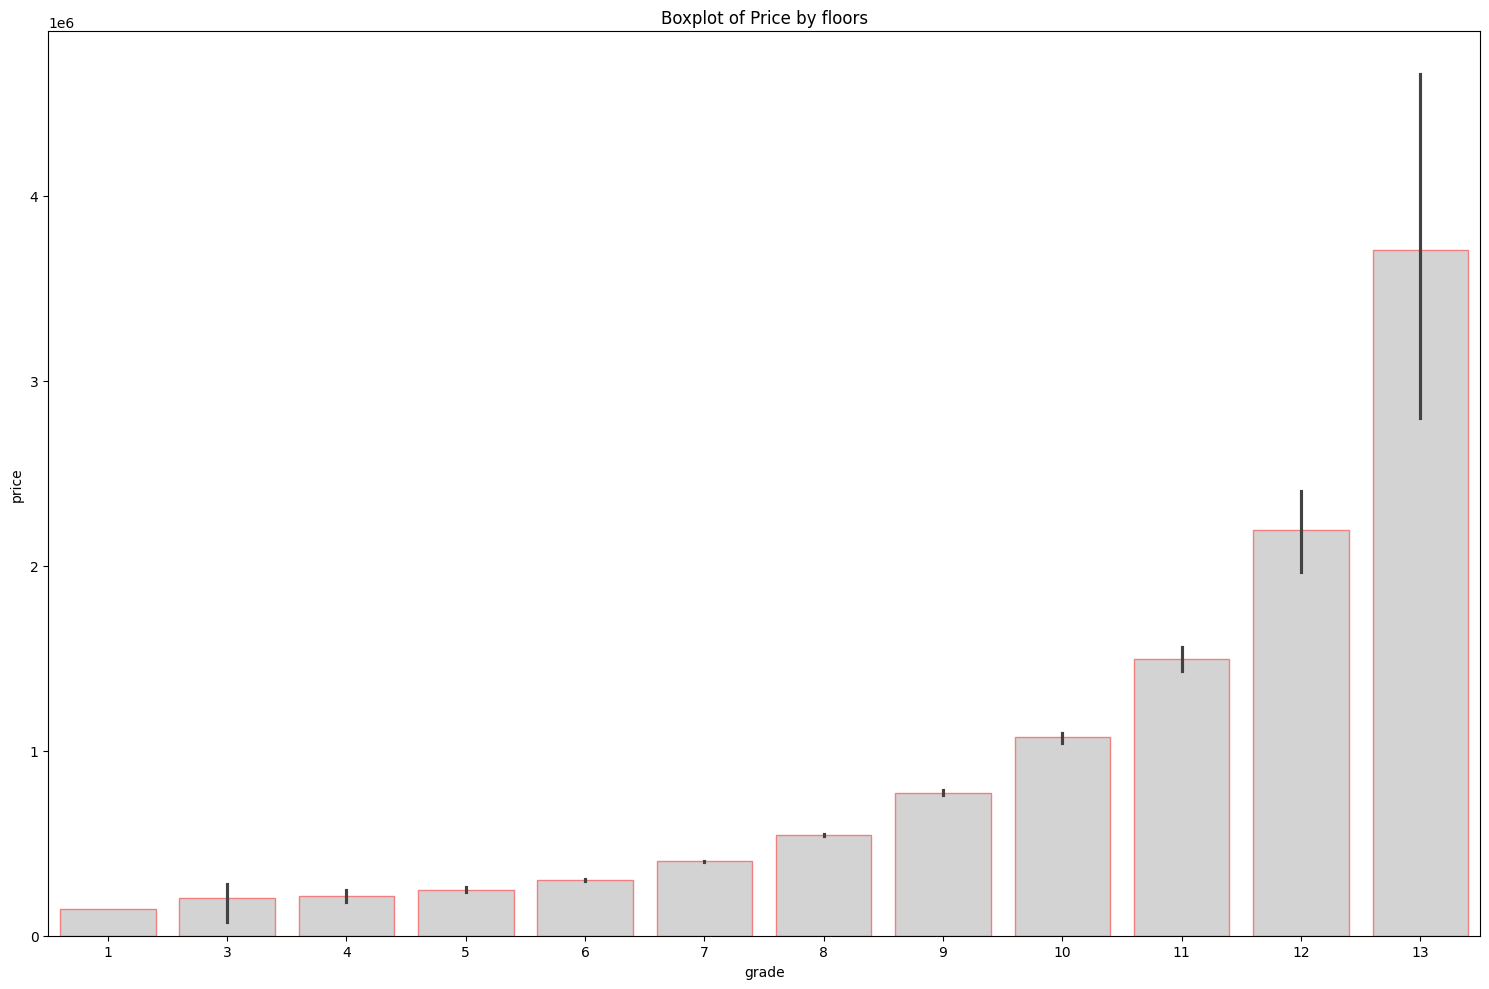

In [477]:
# Visualize price by grade
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='grade', y='price', data=housing_df,color = 'lightgrey',edgecolor='lightcoral', ax=ax)
plt.title('Boxplot of Price by floors')
plt.tight_layout()
plt.show()

### Scaling the Features

In [478]:
# copy the original housing dataframe before making any changes to the data.
original_housing_df = housing_df.copy()

In [479]:
# Check the shape of the dataframe
original_housing_df.shape

(21613, 19)

In [480]:
# Set X and y data
X = housing_df.drop('price',axis = 1)
y = housing_df['price']

In [481]:
# Check the shape of the X data
X.shape

(21613, 18)

In [482]:
# scale numerical data
numerical_columns = X.select_dtypes(include=['float64','int64']).columns
numerical_columns_df = housing_df[numerical_columns]
print(numerical_columns_df.shape)
print(numerical_columns)

(21613, 18)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [483]:
# use Standard Scalar to scale the numeric data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_columns_df)

In [484]:
# create scaled_numerical_data frame
scaled_dataframe = pd.DataFrame(scaled_numerical_data, columns=numerical_columns_df.columns)

In [485]:
# Look at the scaled dataframe
print(scaled_dataframe)

       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -1.473841  -1.447464    -0.979835 -0.228321 -0.915427   -0.087173   
1     -0.398669   0.175607     0.533634 -0.189885  0.936506   -0.087173   
2     -1.473841  -1.447464    -1.426254 -0.123298 -0.915427   -0.087173   
3      0.676503   1.149449    -0.130550 -0.244014 -0.915427   -0.087173   
4     -0.398669  -0.149007    -0.435422 -0.169653 -0.915427   -0.087173   
...         ...        ...          ...       ...       ...         ...   
21608 -0.398669   0.500221    -0.598746 -0.337424  2.788439   -0.087173   
21609  0.676503   0.500221     0.250539 -0.224386  0.936506   -0.087173   
21610 -1.473841  -1.772078    -1.154047 -0.332137  0.936506   -0.087173   
21611 -0.398669   0.500221    -0.522528 -0.307076  0.936506   -0.087173   
21612 -1.473841  -1.772078    -1.154047 -0.338752  0.936506   -0.087173   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
0     -0.305759  -0.62

In [486]:
# Check the shape of the transformed features dataframe
scaled_dataframe.shape

(21613, 18)

In [487]:
# Assign transfomed features dataframe as X
X = scaled_dataframe
X.shape

(21613, 18)

In [488]:
# Verify the transformed features information
scaled_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  float64
 3   sqft_lot       21613 non-null  float64
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  float64
 6   view           21613 non-null  float64
 7   condition      21613 non-null  float64
 8   grade          21613 non-null  float64
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  float64
 11  yr_built       21613 non-null  float64
 12  yr_renovated   21613 non-null  float64
 13  zipcode        21613 non-null  float64
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  float64
 17  sqft_lot15     21613 non-null  float64
dtypes: flo

### Train/Test Split

Now as the data is prepared, split it into a train and test set.

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))

(17290, 18)
(4323, 18)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>



## Use Linear Regression to build a first model on housing data.


In [490]:
linereg = LinearRegression()
linereg.fit(X_train, y_train)
lr_pred = linereg.predict(X_test)

# calculate and print error metrics
all_lr_mse = mean_squared_error(y_test,lr_pred)
all_lr_rmse = np.sqrt(all_lr_mse)
all_lr_mae = mean_absolute_error(y_test,lr_pred)
all_lr_r2 = r2_score(y_test,lr_pred)
print('Linear regression with all the features')
print('-' * 85)
print(f'Mean Squared Error      : {all_lr_mse}')
print(f'Root Mean Squared Error : {all_lr_rmse}')
print(f'Mean Absolute Error     : {all_lr_mae}')
print(f'R2 score                : {all_lr_r2}')


Linear regression with all the features
-------------------------------------------------------------------------------------
Mean Squared Error      : 45173027114.56301
Root Mean Squared Error : 212539.47189772307
Mean Absolute Error     : 127493.63027966078
R2 score                : 0.7011905706891426


In [491]:
# Run linear regression with the Polynomial features and Sequential feature selection.
# Create LinearRegression optimal pipeline
LinearRegression_optimal_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
    ('selector',SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=7,
                                    scoring = 'neg_mean_squared_error')),
    ('linreg', LinearRegression())
])
# Train LinearRegression optimal pipeline
LinearRegression_optimal_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7,
                                           scoring='neg_mean_squared_error')),
                ('linreg', LinearRegression())])

In [492]:
# LinearRegression predict for X_test
lr_pred_optimal = LinearRegression_optimal_pipeline.predict(X_test)

# calculate root mean squared error
optimal_lr_mse = mean_squared_error(y_test,lr_pred_optimal)
optimal_lr_rmse = np.sqrt(optimal_lr_mse)
optimal_lr_mae = mean_absolute_error(y_test,lr_pred_optimal)
optimal_lr_r2 = r2_score(y_test,lr_pred_optimal)
print('Linear regression with Polynomial features and Sequential Selector')
print('-' * 85)
print(f'Mean Squared Error      : {optimal_lr_mse}')
print(f'Root Mean Squared Error : {optimal_lr_rmse}')
print(f'Mean Absolute Error     : {optimal_lr_mae}')
print(f'R2 score                : {optimal_lr_r2}')

Linear regression with Plynomial features and Sequential Selector
-------------------------------------------------------------------------------------
Mean Squared Error      : 44412137857.09791
Root Mean Squared Error : 210741.87494918494
Mean Absolute Error     : 123902.61244833985
R2 score                : 0.7062236822451892
